In [6]:
import pandas as pd
from IPython.display import display
from matplotlib.pyplot import hist

red_wine = pd.read_csv('./data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0,1]
_max = df_train.max(axis=0)
_min = df_train.min(axis=0)

df_train = (df_train - _min) / (_max - _min)
df_valid = (df_valid - _min) / (_max - _min)
# display(df_train.head(4))

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

print(X_train.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


(1119, 11)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1),
])

model.compile(
    optimizer='adam',
    loss="mae"
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10
)

Epoch 1/10


/home/bs00815/Desktop/probability_statistics_and_machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3034 - val_loss: 0.1405
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1441 - val_loss: 0.1257
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1244 - val_loss: 0.1151
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1171 - val_loss: 0.1093
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1106 - val_loss: 0.1133
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1078 - val_loss: 0.1037
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1051 - val_loss: 0.1030
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1030 - val_loss: 0.1090
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1034 - val_loss: 0.1013
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1016 - val_loss: 0.1042


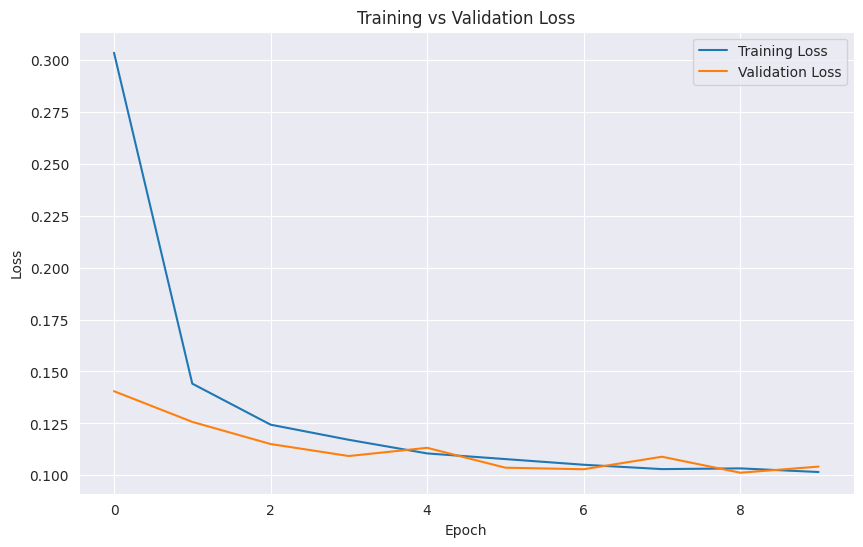

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()